In [1]:
%%time
%load_ext autoreload
%autoreload 2

# loading dependencies
import pandas as pd
import geopandas as gpd
import numpy as np
import folium 
import osmnx as ox
import networkx as nx
import pyproj
import math 
from envirocar import TrackAPI, DownloadClient, BboxSelector, ECConfig

# create an initial but optional config and an api client
config = ECConfig()
track_api = TrackAPI(api_client=DownloadClient(config=config))

Wall time: 4.23 s


In [2]:
#selecting tracks within a bounding box
bbox = BboxSelector([
    7.601165771484375, # min_x
    51.94807412325402, # min_y
    7.648200988769531, # max_x
    51.97261482608728  # max_y
])

# issue a query
track_df = track_api.get_tracks(bbox=bbox, num_results=50) # requesting 50 tracks inside the bbox
track_df

,id,time,geometry,Speed.value,Speed.unit,Throttle Position.value,Throttle Position.unit,GPS VDOP.value,GPS VDOP.unit,GPS Altitude.value,...,sensor.constructionYear,sensor.manufacturer,track.appVersion,track.touVersion,O2 Lambda Voltage ER.value,O2 Lambda Voltage ER.unit,MAF.value,MAF.unit,O2 Lambda Voltage.value,O2 Lambda Voltage.unit
0,5eec7aa7d6e3cf256ba3effb,2020-06-18T21:49:51,POINT (7.65252 51.95404),0.000000,km/h,17.0,%,1.000000,precision,100.000003,...,2007,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5eec7aa7d6e3cf256ba3effd,2020-06-18T21:49:56,POINT (7.65252 51.95404),0.000000,km/h,17.0,%,0.868047,precision,100.000003,...,2007,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5eec7aa7d6e3cf256ba3effe,2020-06-18T21:50:01,POINT (7.65252 51.95404),0.000000,km/h,16.0,%,1.000000,precision,99.999997,...,2007,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5eec7aa7d6e3cf256ba3efff,2020-06-18T21:50:06,POINT (7.65252 51.95404),0.000000,km/h,17.0,%,0.872764,precision,100.000000,...,2007,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5eec7aa7d6e3cf256ba3f000,2020-06-18T21:50:11,POINT (7.65249 51.95402),2.000000,km/h,16.0,%,1.000000,precision,98.000003,...,2007,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,5dcd0c4444ea856b704c40cc,2019-10-31T14:37:26,POINT (7.63761 51.95630),18.000000,km/h,NaN,NaN,0.700000,precision,109.105019,...,2018,Volkswagen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,5dcd0c4444ea856b704c40cd,2019-10-31T14:37:31,POINT (7.63768 51.95653),22.887641,km/h,NaN,NaN,0.700000,precision,106.032607,...,2018,Volkswagen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,5dcd0c4444ea856b704c40ce,2019-10-31T14:37:36,POINT (7.63774 51.95684),24.828686,km/h,NaN,NaN,0.700000,precision,105.397406,...,2018,Volkswagen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,5dcd0c4444ea856b704c40cf,2019-10-31T14:37:41,POINT (7.63784 51.95723),37.000000,km/h,NaN,NaN,0.710060,precision,108.572160,...,2018,Volkswagen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
some_track_id30 = track_df['track.id'].unique()[30]
track_30 = track_df[track_df['track.id'] == some_track_id30]


some_track_id31 = track_df['track.id'].unique()[31]
track_31 = track_df[track_df['track.id'] == some_track_id31]


some_track_id32 = track_df['track.id'].unique()[32]
track_32 = track_df[track_df['track.id'] == some_track_id32]


some_track_id33 = track_df['track.id'].unique()[33]
track_33 = track_df[track_df['track.id'] == some_track_id33]


some_track_id34 = track_df['track.id'].unique()[34]
track_34 = track_df[track_df['track.id'] == some_track_id34]


some_track_id38 = track_df['track.id'].unique()[38]
track_38 = track_df[track_df['track.id'] == some_track_id38]

some_track_id39 = track_df['track.id'].unique()[39]
track_39 = track_df[track_df['track.id'] == some_track_id39]

some_track_id40 = track_df['track.id'].unique()[40]
track_40 = track_df[track_df['track.id'] == some_track_id40]

some_track_id45 = track_df['track.id'].unique()[45]
track_45 = track_df[track_df['track.id'] == some_track_id45]


tracks = pd.concat([track_31, track_32], ignore_index=True)

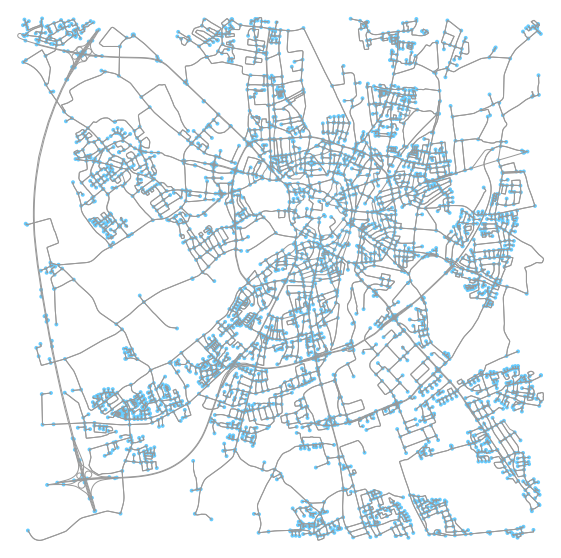

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xba98150>)

In [4]:
import numpy as np
import osmnx as ox

lat = 51.950296032982756
lng = 7.615756988525391

# Get the OSM graph of "drive" streets for münster an plot it
graph = ox.graph_from_point((lat, lng), dist=5000, network_type='drive')
ox.plot_graph(graph, fig_height=10, fig_width=10)

In [5]:
from leuvenmapmatching.matcher.distance import DistanceMatcher
from leuvenmapmatching.map.inmem import InMemMap
from leuvenmapmatching.matcher.newsonkrumm import NewsonKrummMatcher

# Leuven Map Matching is using a different internal graph structure for the street data. 
# Therefore, the OSMnx graph needs to be transformed to the InMemMap
streetmap = InMemMap("enviroCar", use_latlon=True, use_rtree=True, index_edges=True)

# add nodes
nodes = list(graph.nodes)
for node in nodes:
    #if graph.nodes[node]['highway'] == 'traffic_signals':
    lng = graph.nodes[node]['x']
    lat = graph.nodes[node]['y']
    streetmap.add_node(node, (lat, lng))
    #print(graph.nodes[node]['highway'])

# add edges
edges = list(graph.edges)
for edge in edges:
    node_a, node_b = edge[0], edge[1]
    streetmap.add_edge(node_a, node_b)
    #print(graph.edges[edge]['name'])
    # exclude bi-directional edges when street is oneway
    if not graph.edges[edge]['oneway']:
        streetmap.add_edge(node_b, node_a)
    
streetmap.purge()

C:\Users\enan\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\enan\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [6]:
# Get the latitude and longitude coordinates from the track and join them in an array
lats = list(track_31['geometry'].apply(lambda coord: coord.y))
lngs = list(track_31['geometry'].apply(lambda coord: coord.x))

track_coords = [c for c in zip(lats, lngs)]

from leuvenmapmatching.matcher.simple import SimpleMatcher
# Configure the mapmatcher. For increasing the performance it is important 
# that max_dist (in meters) is not set too high
matcher = NewsonKrummMatcher(streetmap,
                          max_dist=100, 
                          max_dist_init=200,
                          #non_emitting_length_factor=0.75,
                          obs_noise=100,
                          #obs_noise_ne=75,
                          dist_noise=5,
                          non_emitting_states=False,
                          non_emitting_edgeid=False)

In [7]:
edge_ids, last_idx = matcher.match(track_coords)

import folium

lat = 51.950296032982756
lng = 7.615756988525391

# get the coordinates of the "best" mapmatched route
coords = [m.edge_m.pi[:] for m in matcher.lattice_best]

# plot both raw and mapmatched track
m = folium.Map(location=[lat, lng], zoom_start=13)
folium.PolyLine(coords, color='blue').add_to(m)
folium.PolyLine(track_coords, color='red').add_to(m)
m

In [8]:
i = 0
edg = []
for edge in edge_ids:
    index = edge_ids[i]
    tup = list(index)
    tup.append(0)
    ed = tuple(tup)
    edg.append(ed)
    i = i+1
track_31['Edge'] = edg

C:\Users\enan\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [9]:
# Get the latitude and longitude coordinates from the track and join them in an array
lats32 = list(track_32['geometry'].apply(lambda coord: coord.y))
lngs32 = list(track_32['geometry'].apply(lambda coord: coord.x))

track_coords32 = [c for c in zip(lats32, lngs32)]

# Perform the mapmatching 
edge_ids32, last_idx32 = matcher.match(track_coords32)
i = 0
edg32 = []
for edge in edge_ids32:
    index = edge_ids32[i]
    tup = list(index)
    tup.append(0)
    ed = tuple(tup)
    edg32.append(ed)
    i = i+1
    
track_32['Edge'] = edg32

C:\Users\enan\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [10]:
# Get the latitude and longitude coordinates from the track and join them in an array
lats33 = list(track_33['geometry'].apply(lambda coord: coord.y))
lngs33 = list(track_33['geometry'].apply(lambda coord: coord.x))

track_coords33 = [c for c in zip(lats33, lngs33)]

# Perform the mapmatching 
edge_ids33, last_idx33 = matcher.match(track_coords33)
i = 0
edg33 = []
for edge in edge_ids33:
    index = edge_ids33[i]
    tup = list(index)
    tup.append(0)
    ed = tuple(tup)
    edg33.append(ed)
    i = i+1
    
track_33['Edge'] = edg33

C:\Users\enan\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [11]:
lats34 = list(track_34['geometry'].apply(lambda coord: coord.y))
lngs34 = list(track_34['geometry'].apply(lambda coord: coord.x))

track_coords34 = [c for c in zip(lats34, lngs34)]

# Perform the mapmatching 
edge_ids34, last_idx34 = matcher.match(track_coords34)

i = 0
edg34 = []
for edge in edge_ids34:
    index = edge_ids34[i]
    tup = list(index)
    tup.append(0)
    ed = tuple(tup)
    edg34.append(ed)
    i = i+1
track_34["Edge"]=edg34

C:\Users\enan\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [12]:
lats39 = list(track_39['geometry'].apply(lambda coord: coord.y))
lngs39 = list(track_39['geometry'].apply(lambda coord: coord.x))

track_coords39 = [c for c in zip(lats39, lngs39)]

# Perform the mapmatching 
edge_ids39, last_idx39 = matcher.match(track_coords39)

i = 0
edg39 = []
for edge in edge_ids39:
    index = edge_ids39[i]
    tup = list(index)
    tup.append(0)
    ed = tuple(tup)
    edg39.append(ed)
    i = i+1
track_39["Edge"]=edg39

C:\Users\enan\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [13]:
lats40 = list(track_40['geometry'].apply(lambda coord: coord.y))
lngs40 = list(track_40['geometry'].apply(lambda coord: coord.x))

track_coords40 = [c for c in zip(lats40, lngs40)]

# Perform the mapmatching 
edge_ids40, last_idx40 = matcher.match(track_coords40)
i = 0
edg40 = []
for edge in edge_ids40:
    index = edge_ids40[i]
    tup = list(index)
    tup.append(0)
    ed = tuple(tup)
    edg40.append(ed)
    i = i+1
    
track_40['Edge'] = edg40

C:\Users\enan\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [14]:
#combine the df of 6 tracks
tracks = pd.concat([track_31, track_32, track_33, track_34, track_39, track_40], ignore_index=True)

In [15]:
#cars waiting(stopped car) in the segment
def nfwc(edge):
    uniq = tracks[(tracks['Edge'] == edge)]
    uniq1= uniq[(uniq['Speed.value'] < 5)]['track.id'].unique()
    num1 = len(uniq1)
    print("no.of wcars:{}".format(num1)) 
    
#average speed of tracks
def avg(edge):
    speed = tracks[(tracks['Edge'] == edge)]['Speed.value'].mean()
    print('The average speed for the edge {} is {}'.format(edge,speed))
    
#no.of.stops
def no_of_stops(edge):
    count = 0
    track= tracks[(tracks['Edge'] == edge)]
    list_of_speedS = list(track['Speed.value'])
    for i in range(len(list_of_speedS)):
        if list_of_speedS[i]!=list_of_speedS[0]:
            if list_of_speedS[i]<5 and list_of_speedS[i-1]<5:
                continue
            elif list_of_speedS[i]<5:
                count=count+1
                for x in list_of_speedS[i+1:len(list_of_speedS)]:
                    if x<5:
                        count=count
                    elif x>5:
                        break
        elif i==0 and list_of_speedS[i]<5:
            count=count+1
    print(f'The number of cars stops in this segment is {count}')

#no.of.cars.passing.the.segment
def num(edge):
    nfc = tracks[(tracks['Edge'] == edge)]['track.id'].unique()
    no = len(nfc)
    print('NUmber of car traversing the {} is {}'.format(edge,no))

In [16]:
 print(tracks['Edge'].unique())

[(1611622417, 4017092106, 0) (4017092106, 2705735628, 0)
 (2705735628, 278156525, 0) (278156525, 278156529, 0)
 (278156529, 278156537, 0) (278156537, 278156460, 0)
 (278156460, 29041433, 0) (29041433, 277898402, 0)
 (277898402, 277898418, 0) (277898418, 29041426, 0)
 (29041426, 277896979, 0) (277896979, 29041418, 0) (29041418, 29041414, 0)
 (29041414, 277727455, 0) (277727455, 277727447, 0)
 (277727447, 277727525, 0) (277727525, 277727469, 0)
 (277727469, 277727478, 0) (277727478, 277727457, 0)
 (277727457, 54781716, 0) (54781716, 302697571, 0)
 (302697571, 302697583, 0) (302697583, 54781758, 0)
 (54781758, 256787271, 0) (256787271, 302697586, 0)
 (302697586, 254321187, 0) (254321187, 302697589, 0)
 (302697589, 54781720, 0) (54781720, 303364981, 0)
 (303364981, 304637903, 0) (304637903, 34924748, 0)
 (34924748, 34924790, 0) (34924790, 7152154273, 0)
 (7152154273, 33846185, 0) (33846185, 60676690, 0) (60676690, 21518910, 0)
 (21518910, 6425072711, 0) (6425072711, 6425072705, 0)
 (642507

In [17]:
if __name__ == '__main__':
    print("The average speed:")
    average_speed = avg((29041426, 277896979, 0))
    no_stops = no_of_stops((29041426, 277896979, 0))
    no_of_wairingcar = nfwc((29041426, 277896979, 0))
    no_of_cartransverse = num((29041426, 277896979, 0))

The average speed:
The average speed for the edge (29041426, 277896979, 0) is 18.520932666666667
The number of cars stops in this segment is 3
no.of wcars:1
NUmber of car traversing the (29041426, 277896979, 0) is 3


In [18]:
tracks.head()

,id,time,geometry,Speed.value,Speed.unit,Throttle Position.value,Throttle Position.unit,GPS VDOP.value,GPS VDOP.unit,GPS Altitude.value,...,sensor.manufacturer,track.appVersion,track.touVersion,O2 Lambda Voltage ER.value,O2 Lambda Voltage ER.unit,MAF.value,MAF.unit,O2 Lambda Voltage.value,O2 Lambda Voltage.unit,Edge
0,5de9d7a03bdb691868e765cf,2019-11-27T14:56:33,POINT (7.65039 51.94099),0.000000,km/h,13.000000,%,1.212573,precision,92.221026,...,Mercedes Benz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(1611622417, 4017092106, 0)"
1,5de9d7a03bdb691868e765d1,2019-11-27T14:56:38,POINT (7.65039 51.94099),0.000000,km/h,13.336957,%,1.000000,precision,93.178808,...,Mercedes Benz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(1611622417, 4017092106, 0)"
2,5de9d7a03bdb691868e765d2,2019-11-27T14:56:43,POINT (7.65036 51.94100),9.135514,km/h,18.098877,%,1.000000,precision,95.268083,...,Mercedes Benz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(1611622417, 4017092106, 0)"
3,5de9d7a03bdb691868e765d3,2019-11-27T14:56:48,POINT (7.65004 51.94121),36.277108,km/h,20.248292,%,1.042262,precision,95.467452,...,Mercedes Benz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(1611622417, 4017092106, 0)"
4,5de9d7a03bdb691868e765d4,2019-11-27T14:56:53,POINT (7.64947 51.94158),47.240175,km/h,16.918660,%,1.033501,precision,95.101802,...,Mercedes Benz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(1611622417, 4017092106, 0)"


In [19]:
# Recalling the OSM graph
tracks = ox.graph_to_gdfs(graph, nodes=False, edges=True)
tracks.columns

Index(['u', 'v', 'key', 'osmid', 'name', 'highway', 'maxspeed', 'oneway',
       'length', 'geometry', 'lanes', 'ref', 'bridge', 'tunnel', 'service',
       'access', 'width', 'junction', 'area'],
      dtype='object')

In [20]:
tracks.head()

,u,v,key,osmid,name,highway,maxspeed,oneway,length,geometry,lanes,ref,bridge,tunnel,service,access,width,junction,area
0,2896166920,2896166784,0,285975591,Palestrinastraße,residential,30,False,26.116,"LINESTRING (7.64487 51.98282, 7.64488 51.98259)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2896166926,2896166785,0,285975587,Palestrinastraße,residential,30,False,25.730,"LINESTRING (7.64441 51.98285, 7.64442 51.98262)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5390434323,5390434370,0,558856580,Schlossplatz,residential,50,False,6.146,"LINESTRING (7.61792 51.96347, 7.61783 51.96347)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5390434323,5390434336,0,"[558856586, 558885438]",Schlossplatz,secondary,50,True,200.247,"LINESTRING (7.61792 51.96347, 7.61792 51.96356...","[3, 2]",K 6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2896166939,2896166786,0,285975586,Palestrinastraße,residential,30,False,26.277,"LINESTRING (7.64397 51.98288, 7.64397 51.98264)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
track_df['lat'] = track_df['geometry'].apply(lambda coord: coord.y)
track_df['lng'] = track_df['geometry'].apply(lambda coord: coord.x)
track_df['speed'] = track_df['GPS Speed.value']
export = track_df[['track.id','lat','lng','speed']]

# Check the cell below, I cannot run it for all tracks, I did only for "0" (track1)

In [22]:
some_track = export ['track.id'].unique()[0]
some_data = export [export ['track.id'] == some_track]
some_data

,track.id,lat,lng,speed
0,5eec7aa7d6e3cf256ba3eff9,51.954038,7.652525,0.000000
1,5eec7aa7d6e3cf256ba3eff9,51.954038,7.652525,0.000000
2,5eec7aa7d6e3cf256ba3eff9,51.954035,7.652524,0.000000
3,5eec7aa7d6e3cf256ba3eff9,51.954037,7.652525,0.000000
4,5eec7aa7d6e3cf256ba3eff9,51.954023,7.652486,2.562177
...,...,...,...,...
171,5eec7aa7d6e3cf256ba3eff9,51.955458,7.590657,18.276997
172,5eec7aa7d6e3cf256ba3eff9,51.955396,7.590325,13.629268
173,5eec7aa7d6e3cf256ba3eff9,51.955337,7.590176,2.645545
174,5eec7aa7d6e3cf256ba3eff9,51.955341,7.590168,0.000000


In [23]:
pEdge = tracks.to_crs('EPSG:25832')
pEdge ['geometry'] = pEdge .geometry.buffer(6)
pEdge .head()

,u,v,key,osmid,name,highway,maxspeed,oneway,length,geometry,lanes,ref,bridge,tunnel,service,access,width,junction,area
0,2896166920,2896166784,0,285975591,Palestrinastraße,residential,30,False,26.116,"POLYGON ((406942.200 5759968.659, 406942.175 5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2896166926,2896166785,0,285975587,Palestrinastraße,residential,30,False,25.730,"POLYGON ((406910.650 5759972.490, 406910.627 5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5390434323,5390434370,0,558856580,Schlossplatz,residential,50,False,6.146,"POLYGON ((405038.460 5757871.198, 405037.872 5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5390434323,5390434336,0,"[558856586, 558885438]",Schlossplatz,secondary,50,True,200.247,"POLYGON ((405038.961 5757887.548, 405039.160 5...","[3, 2]",K 6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2896166939,2896166786,0,285975586,Palestrinastraße,residential,30,False,26.277,"POLYGON ((406879.895 5759976.084, 406879.862 5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
some_track = gpd.GeoDataFrame(
    some_data, geometry=gpd.points_from_xy(some_data.lng, some_data.lat),crs="EPSG:4326")
some_trkPrj = some_track.to_crs('EPSG:25832')
some_trkPrj

,track.id,lat,lng,speed,geometry
0,5eec7aa7d6e3cf256ba3eff9,51.954038,7.652525,0.000000,POINT (407402.440 5756783.793)
1,5eec7aa7d6e3cf256ba3eff9,51.954038,7.652525,0.000000,POINT (407402.440 5756783.793)
2,5eec7aa7d6e3cf256ba3eff9,51.954035,7.652524,0.000000,POINT (407402.402 5756783.449)
3,5eec7aa7d6e3cf256ba3eff9,51.954037,7.652525,0.000000,POINT (407402.421 5756783.621)
4,5eec7aa7d6e3cf256ba3eff9,51.954023,7.652486,2.562177,POINT (407399.708 5756782.179)
...,...,...,...,...,...
171,5eec7aa7d6e3cf256ba3eff9,51.955458,7.590657,18.276997,POINT (403154.163 5757022.202)
172,5eec7aa7d6e3cf256ba3eff9,51.955396,7.590325,13.629268,POINT (403131.242 5757015.790)
173,5eec7aa7d6e3cf256ba3eff9,51.955337,7.590176,2.645545,POINT (403120.833 5757009.436)
174,5eec7aa7d6e3cf256ba3eff9,51.955341,7.590168,0.000000,POINT (403120.319 5757009.843)


In [25]:
join = gpd.sjoin(some_trkPrj, pEdge )
len(join)
join.to_csv('table.csv')

speedList= []
for i in join['maxspeed']:
     
    if (type(i) ==str and len(i) <= 3):
        speedList.append(int(i))
    elif type(i) == list:
        con = []
        for j in i:
            try:
                con.append(int(j))
            except ValueError:
                con.append(999)
        speedList.append(con)        
        
    else:
        speedList.append(None)
            
print(speedList)  

[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 50, 50, 50, 50, 50, 50, 30, 30, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, None, None, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 30, 50, 50, 50, 50, 50, 50, 30, 50, 50, 50, 50, 50, 50, 50, 30, 30, 50, 50, 50, 50, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 30, 30, 30, 30, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50,

In [26]:
join['spLimit'] = speedList
sPL = join[['track.id', 'lat', 'lng', 'speed', 'geometry', 'spLimit']]
sPL

,track.id,lat,lng,speed,geometry,spLimit
4,5eec7aa7d6e3cf256ba3eff9,51.954023,7.652486,2.562177,POINT (407399.708 5756782.179),30.0
5,5eec7aa7d6e3cf256ba3eff9,51.954023,7.652441,5.170431,POINT (407396.633 5756782.212),30.0
6,5eec7aa7d6e3cf256ba3eff9,51.954030,7.652256,11.892974,POINT (407383.943 5756783.254),30.0
7,5eec7aa7d6e3cf256ba3eff9,51.953989,7.651974,13.846142,POINT (407364.500 5756779.007),30.0
8,5eec7aa7d6e3cf256ba3eff9,51.953967,7.651735,12.835740,POINT (407347.986 5756776.906),30.0
...,...,...,...,...,...,...
175,5eec7aa7d6e3cf256ba3eff9,51.955339,7.590168,0.000000,POINT (403120.303 5757009.695),30.0
170,5eec7aa7d6e3cf256ba3eff9,51.955528,7.591014,15.756766,POINT (403178.870 5757029.591),30.0
170,5eec7aa7d6e3cf256ba3eff9,51.955528,7.591014,15.756766,POINT (403178.870 5757029.591),30.0
170,5eec7aa7d6e3cf256ba3eff9,51.955528,7.591014,15.756766,POINT (403178.870 5757029.591),30.0


In [27]:
sPL['ovspeed'] = sPL['speed']-sPL['spLimit']
sPL[sPL['ovspeed'] > 0]

C:\Users\enan\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,track.id,lat,lng,speed,geometry,spLimit,ovspeed
30,5eec7aa7d6e3cf256ba3eff9,51.954280,7.645469,31.289283,POINT (406918.070 5756819.645),30.0,1.289283
30,5eec7aa7d6e3cf256ba3eff9,51.954280,7.645469,31.289283,POINT (406918.070 5756819.645),30.0,1.289283
84,5eec7aa7d6e3cf256ba3eff9,51.954058,7.631436,40.453065,POINT (405953.336 5756813.099),30.0,10.453065
86,5eec7aa7d6e3cf256ba3eff9,51.954457,7.629857,41.568740,POINT (405845.635 5756859.461),30.0,11.568740
96,5eec7aa7d6e3cf256ba3eff9,51.955661,7.624902,37.923061,POINT (405507.712 5756999.787),30.0,7.923061
96,5eec7aa7d6e3cf256ba3eff9,51.955661,7.624902,37.923061,POINT (405507.712 5756999.787),30.0,7.923061
97,5eec7aa7d6e3cf256ba3eff9,51.955662,7.624100,41.181484,POINT (405452.622 5757000.958),30.0,11.181484
97,5eec7aa7d6e3cf256ba3eff9,51.955662,7.624100,41.181484,POINT (405452.622 5757000.958),30.0,11.181484
98,5eec7aa7d6e3cf256ba3eff9,51.955678,7.623283,40.019382,POINT (405396.490 5757003.740),30.0,10.019382
98,5eec7aa7d6e3cf256ba3eff9,51.955678,7.623283,40.019382,POINT (405396.490 5757003.740),30.0,10.019382


In [28]:
sPL.to_crs('EPSG:4326')

,track.id,lat,lng,speed,geometry,spLimit,ovspeed
4,5eec7aa7d6e3cf256ba3eff9,51.954023,7.652486,2.562177,POINT (7.65249 51.95402),30.0,-27.437823
5,5eec7aa7d6e3cf256ba3eff9,51.954023,7.652441,5.170431,POINT (7.65244 51.95402),30.0,-24.829569
6,5eec7aa7d6e3cf256ba3eff9,51.954030,7.652256,11.892974,POINT (7.65226 51.95403),30.0,-18.107026
7,5eec7aa7d6e3cf256ba3eff9,51.953989,7.651974,13.846142,POINT (7.65197 51.95399),30.0,-16.153858
8,5eec7aa7d6e3cf256ba3eff9,51.953967,7.651735,12.835740,POINT (7.65173 51.95397),30.0,-17.164260
...,...,...,...,...,...,...,...
175,5eec7aa7d6e3cf256ba3eff9,51.955339,7.590168,0.000000,POINT (7.59017 51.95534),30.0,-30.000000
170,5eec7aa7d6e3cf256ba3eff9,51.955528,7.591014,15.756766,POINT (7.59101 51.95553),30.0,-14.243234
170,5eec7aa7d6e3cf256ba3eff9,51.955528,7.591014,15.756766,POINT (7.59101 51.95553),30.0,-14.243234
170,5eec7aa7d6e3cf256ba3eff9,51.955528,7.591014,15.756766,POINT (7.59101 51.95553),30.0,-14.243234


In [29]:
#Color Specification

def col(array):
    colo = []
    for value in array:
        if value > 0: 
            colo .append('red')
        else:
            colo .append('green')
    return colo 
##Map Propertise

y = list(sPL['lat'])
x = list(sPL['lng'])
speed = list(sPL['ovspeed']) 
def pu(i):
    return('Limit exceeded by ' + str(round(i, 2))+ 'Km/h')
ospColor = col(sPL['ovspeed'])
m = folium.Map(location=[51.950296032982756, 7.615756988525391], tiles = 'OpenStreetMap', zoom_start=13)
for lat, lng , colo , pop in zip(y,x, ospColor, speed):
    folium.CircleMarker([lat, lng], color= colo,radius=5.0, popup = pu(pop)).add_to(m)
m